In [1]:
#Time series
#Furniture sales

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import itertools
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

In [4]:
furniture = pd.read_csv("Super Store.csv")

#If encoding error:
#furniture = pd.read_csv("Super Store.csv", encoding = "cp1252")

In [7]:
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [8]:
furniture.shape

(2121, 21)

In [10]:
furniture.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [11]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [13]:
furniture["Order Date"].min(),furniture["Order Date"].max()

('1/1/2017', '9/9/2017')

In [16]:
furniture.drop(furniture.columns.difference(["Order Date","Sales"]),axis=1,inplace=True)

In [18]:
furniture.head()

,Order Date,Sales
0,11/8/2016,261.9600
1,11/8/2016,731.9400
2,10/11/2015,957.5775
3,6/9/2014,48.8600
4,6/9/2014,1706.1840


In [19]:
furniture.sort_values("Order Date")

,Order Date,Sales
845,1/1/2017,474.430
1707,1/1/2017,141.420
1708,1/1/2017,310.744
179,1/1/2017,48.896
181,1/10/2014,51.940
...,...,...
1524,9/9/2017,66.112
1152,9/9/2017,243.920
251,9/9/2017,17.024
250,9/9/2017,141.372


In [20]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [ ]:
# Aggregate sales date

In [27]:
furniture = furniture.groupby("Order Date")["Sales"].sum().reset_index()

In [30]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  889 non-null    object 
 1   Sales       889 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.0+ KB


In [32]:
furniture["Order Date"] = furniture["Order Date"].astype("datetime64")

#Another way

#furniture["Order Date"] = pd.to_datetime(furniture["Order Date"])

In [36]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  889 non-null    datetime64[ns]
 1   Sales       889 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.0 KB


In [38]:
furniture.set_index("Order Date", inplace=True)

In [40]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 889 entries, 2017-01-01 to 2017-09-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   889 non-null    float64
dtypes: float64(1)
memory usage: 13.9 KB


In [42]:
furniture.index

DatetimeIndex(['2017-01-01', '2014-01-10', '2015-01-10', '2016-01-10',
               '2014-01-11', '2016-01-11', '2017-01-12', '2014-01-13',
               '2015-01-13', '2017-01-13',
               ...
               '2014-09-07', '2015-09-07', '2017-09-07', '2014-09-08',
               '2015-09-08', '2016-09-08', '2017-09-08', '2014-09-09',
               '2016-09-09', '2017-09-09'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [44]:
y = furniture["Sales"].resample("MS").mean()

In [47]:
y.head()

Order Date
2014-01-01    480.194231
2014-02-01    367.931600
2014-03-01    857.291529
2014-04-01    567.488357
2014-05-01    432.049187
Freq: MS, Name: Sales, dtype: float64

In [49]:
y["2017":]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

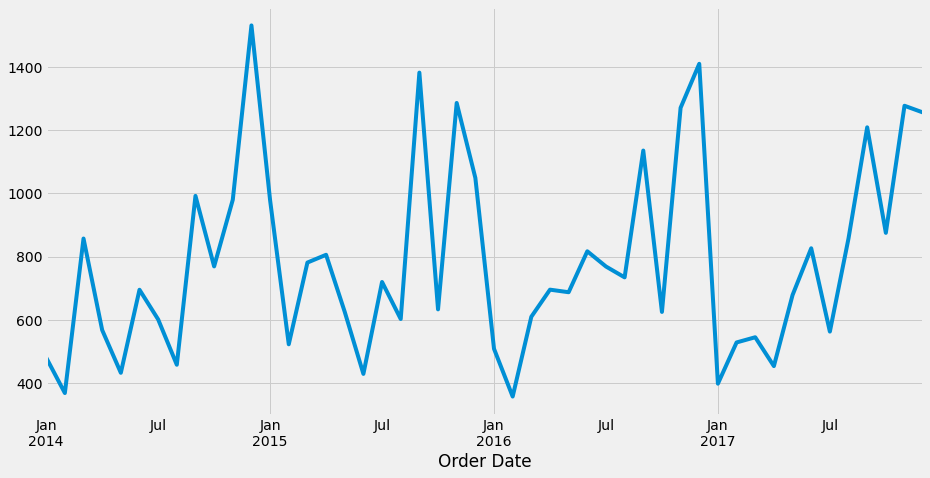

In [52]:
y.plot(figsize=(14,7))
plt.show()

In [55]:
#Checking for stationarity
#Augment dickey fuller test (ADF)
#H0: Time series can be represented by a unit root i.e not stationary
#H1: if we reject null hypothesis then time series is stationary

In [57]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller

In [68]:
result = adfuller(y)
print("P-value: %f" % result[1])

P-value: 0.000009


In [69]:
if result[1]<0.05:
    print("we reject Null hypothesis - Data is stationary")
else: 
    print("we fail to reject Null hypothesis - Data is not stationary")

we reject Null hypothesis - Data is stationary


In [ ]:
# Decomposition - split data into: trend, seasonality and residual

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [73]:
decomposition = seasonal_decompose(y)

In [81]:
decomposition.trend.head()

Order Date
2014-01-01   NaN
2014-02-01   NaN
2014-03-01   NaN
2014-04-01   NaN
2014-05-01   NaN
Freq: MS, Name: trend, dtype: float64

In [82]:
decomposition.seasonal.head()

Order Date
2014-01-01   -149.858992
2014-02-01   -313.772729
2014-03-01   -146.335750
2014-04-01   -144.492328
2014-05-01   -138.079245
Freq: MS, Name: seasonal, dtype: float64

In [83]:
decomposition.resid.head()

Order Date
2014-01-01   NaN
2014-02-01   NaN
2014-03-01   NaN
2014-04-01   NaN
2014-05-01   NaN
Freq: MS, Name: resid, dtype: float64

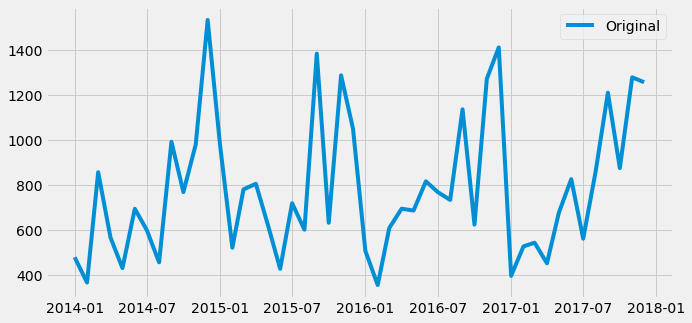

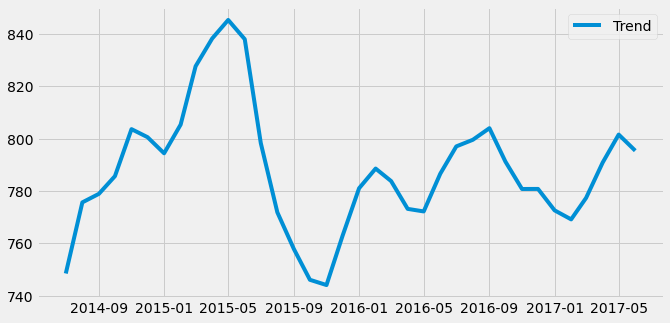

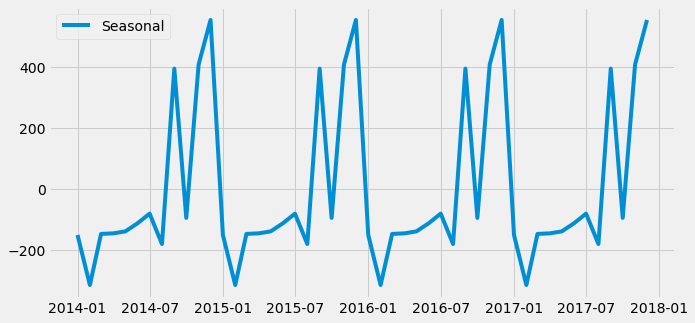

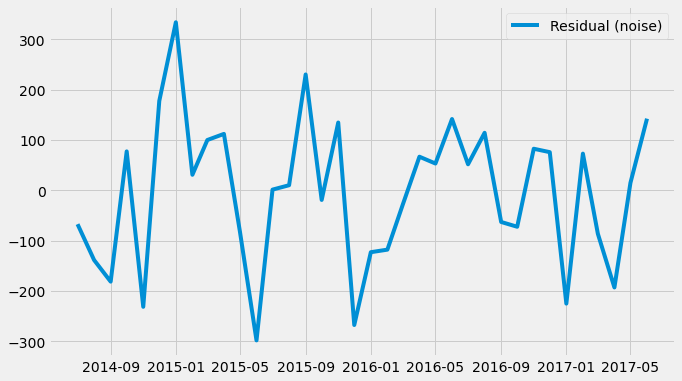

In [102]:
# Plotting original data
plt.figure(figsize=(10,5))
plt.plot(y, label = "Original")
plt.legend(loc = "best");

#plotting trend data
trend = decomposition.trend
plt.figure(figsize=(10,5))
plt.plot(trend, label = "Trend")
plt.legend(loc = "best");

#plotting seasonal data
plt.figure(figsize=(10,5))
seasonal = decomposition.seasonal
plt.plot(seasonal, label = "Seasonal")
plt.legend(loc = "best");

#Plotting residual data
plt.figure(figsize=(10,6))
residual = decomposition.resid
plt.plot(residual, label = "Residual (noise)")
plt.legend(loc = "best");

In [103]:
# Forecasting - ARIMA

In [117]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in pdq]

In [118]:
print("Example for paramters combinations for seasonal ARIMA...")
print("SARIMAX: {} x {}".format(pdq[1],seasonal_pdq[1]))

Example for paramters combinations for seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)


In [270]:
print("All possible combinations....")
for i in pdq:
    for j in seasonal_pdq:
        print("SARIMAX: {} x {}".format(i,j))

All possible combinations....
SARIMAX: (0, 0, 0) x (0, 0, 0, 12)
SARIMAX: (0, 0, 0) x (0, 0, 1, 12)
SARIMAX: (0, 0, 0) x (0, 1, 0, 12)
SARIMAX: (0, 0, 0) x (0, 1, 1, 12)
SARIMAX: (0, 0, 0) x (1, 0, 0, 12)
SARIMAX: (0, 0, 0) x (1, 0, 1, 12)
SARIMAX: (0, 0, 0) x (1, 1, 0, 12)
SARIMAX: (0, 0, 0) x (1, 1, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 0, 12)
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 0, 1) x (0, 1, 1, 12)
SARIMAX: (0, 0, 1) x (1, 0, 0, 12)
SARIMAX: (0, 0, 1) x (1, 0, 1, 12)
SARIMAX: (0, 0, 1) x (1, 1, 0, 12)
SARIMAX: (0, 0, 1) x (1, 1, 1, 12)
SARIMAX: (0, 1, 0) x (0, 0, 0, 12)
SARIMAX: (0, 1, 0) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
SARIMAX: (0, 1, 0) x (1, 0, 1, 12)
SARIMAX: (0, 1, 0) x (1, 1, 0, 12)
SARIMAX: (0, 1, 0) x (1, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 0, 0, 12)
SARIMAX: (0, 1, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 1) x (0, 

In [125]:
# Parameter selection using - Grid search

In [189]:
from pylab import rcParams
output = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal,
                                           enforce_stationarity = False, enforce_invertibility = False)
            results = mod.fit()
            print("ARIMA: {} x {}, 12 - AIC:{}".format(param,param_seasonal,results.aic))
            output.append([param, param_seasonal,results.aic])
        except:
            continue
print("Completed!")

ARIMA: (0, 0, 0) x (0, 0, 0, 12), 12 - AIC:769.0817523205915


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA: (0, 0, 0) x (0, 0, 1, 12), 12 - AIC:1497.3167902029463
ARIMA: (0, 0, 0) x (0, 1, 0, 12), 12 - AIC:477.7170130919702
ARIMA: (0, 0, 0) x (0, 1, 1, 12), 12 - AIC:302.2702899793627
ARIMA: (0, 0, 0) x (1, 0, 0, 12), 12 - AIC:497.23144334183377


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA: (0, 0, 0) x (1, 0, 1, 12), 12 - AIC:1194.3822749197045
ARIMA: (0, 0, 0) x (1, 1, 0, 12), 12 - AIC:318.0047199116341
ARIMA: (0, 0, 0) x (1, 1, 1, 12), 12 - AIC:304.24882803021853
ARIMA: (0, 0, 1) x (0, 0, 0, 12), 12 - AIC:720.9252270758101
ARIMA: (0, 0, 1) x (0, 0, 1, 12), 12 - AIC:2680.711983689821
ARIMA: (0, 0, 1) x (0, 1, 0, 12), 12 - AIC:466.56074298091534
ARIMA: (0, 0, 1) x (0, 1, 1, 12), 12 - AIC:291.6261389673295


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA: (0, 0, 1) x (1, 0, 0, 12), 12 - AIC:499.58172442175066
ARIMA: (0, 0, 1) x (1, 0, 1, 12), 12 - AIC:2407.372852380833
ARIMA: (0, 0, 1) x (1, 1, 0, 12), 12 - AIC:319.9884876946869
ARIMA: (0, 0, 1) x (1, 1, 1, 12), 12 - AIC:291.87255764853296
ARIMA: (0, 1, 0) x (0, 0, 0, 12), 12 - AIC:677.894766843944


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA: (0, 1, 0) x (0, 0, 1, 12), 12 - AIC:1350.9430816284957
ARIMA: (0, 1, 0) x (0, 1, 0, 12), 12 - AIC:486.6378567189769
ARIMA: (0, 1, 0) x (0, 1, 1, 12), 12 - AIC:304.9671228167956
ARIMA: (0, 1, 0) x (1, 0, 0, 12), 12 - AIC:497.7889663004408
ARIMA: (0, 1, 0) x (1, 0, 1, 12), 12 - AIC:1407.8379085237896
ARIMA: (0, 1, 0) x (1, 1, 0, 12), 12 - AIC:319.7714068109211
ARIMA: (0, 1, 0) x (1, 1, 1, 12), 12 - AIC:306.9113200151442
ARIMA: (0, 1, 1) x (0, 0, 0, 12), 12 - AIC:649.9056176817218
ARIMA: (0, 1, 1) x (0, 0, 1, 12), 12 - AIC:2554.9397656593483
ARIMA: (0, 1, 1) x (0, 1, 0, 12), 12 - AIC:458.8705548483169
ARIMA: (0, 1, 1) x (0, 1, 1, 12), 12 - AIC:279.58062334186917
ARIMA: (0, 1, 1) x (1, 0, 0, 12), 12 - AIC:486.18329774427514
ARIMA: (0, 1, 1) x (1, 0, 1, 12), 12 - AIC:2556.0017824581873
ARIMA: (0, 1, 1) x (1, 1, 0, 12), 12 - AIC:310.75743684174125
ARIMA: (0, 1, 1) x (1, 1, 1, 12), 12 - AIC:281.5576621461245
ARIMA: (1, 0, 0) x (0, 0, 0, 12), 12 - AIC:692.1645522067712


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA: (1, 0, 0) x (0, 0, 1, 12), 12 - AIC:1585.6856253189105
ARIMA: (1, 0, 0) x (0, 1, 0, 12), 12 - AIC:479.4632147852136
ARIMA: (1, 0, 0) x (0, 1, 1, 12), 12 - AIC:304.20776751609145
ARIMA: (1, 0, 0) x (1, 0, 0, 12), 12 - AIC:480.9259367935196


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA: (1, 0, 0) x (1, 0, 1, 12), 12 - AIC:1255.3434350268503
ARIMA: (1, 0, 0) x (1, 1, 0, 12), 12 - AIC:304.4664675084565
ARIMA: (1, 0, 0) x (1, 1, 1, 12), 12 - AIC:304.58426921438013
ARIMA: (1, 0, 1) x (0, 0, 0, 12), 12 - AIC:665.7794442185935
ARIMA: (1, 0, 1) x (0, 0, 1, 12), 12 - AIC:2463.0783746293123
ARIMA: (1, 0, 1) x (0, 1, 0, 12), 12 - AIC:468.36851958151
ARIMA: (1, 0, 1) x (0, 1, 1, 12), 12 - AIC:293.3422193965907
ARIMA: (1, 0, 1) x (1, 0, 0, 12), 12 - AIC:482.5763323876897
ARIMA: (1, 0, 1) x (1, 0, 1, 12), 12 - AIC:2391.6345934603605


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA: (1, 0, 1) x (1, 1, 0, 12), 12 - AIC:306.01560022882904
ARIMA: (1, 0, 1) x (1, 1, 1, 12), 12 - AIC:293.7513188130499
ARIMA: (1, 1, 0) x (0, 0, 0, 12), 12 - AIC:671.2513547541902


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA: (1, 1, 0) x (0, 0, 1, 12), 12 - AIC:1615.1778844733526
ARIMA: (1, 1, 0) x (0, 1, 0, 12), 12 - AIC:479.2003422281135
ARIMA: (1, 1, 0) x (0, 1, 1, 12), 12 - AIC:300.21306116190976
ARIMA: (1, 1, 0) x (1, 0, 0, 12), 12 - AIC:475.34036587836044
ARIMA: (1, 1, 0) x (1, 0, 1, 12), 12 - AIC:1409.8380032460425
ARIMA: (1, 1, 0) x (1, 1, 0, 12), 12 - AIC:300.62709013454116
ARIMA: (1, 1, 0) x (1, 1, 1, 12), 12 - AIC:302.3264992506053
ARIMA: (1, 1, 1) x (0, 0, 0, 12), 12 - AIC:649.0318019835344


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA: (1, 1, 1) x (0, 0, 1, 12), 12 - AIC:2541.0340584798573
ARIMA: (1, 1, 1) x (0, 1, 0, 12), 12 - AIC:460.47626876099184
ARIMA: (1, 1, 1) x (0, 1, 1, 12), 12 - AIC:281.3873006939403
ARIMA: (1, 1, 1) x (1, 0, 0, 12), 12 - AIC:469.52503546608375


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA: (1, 1, 1) x (1, 0, 1, 12), 12 - AIC:194.25738498051948
ARIMA: (1, 1, 1) x (1, 1, 0, 12), 12 - AIC:297.78754395497197
ARIMA: (1, 1, 1) x (1, 1, 1, 12), 12 - AIC:283.36610144033807
Completed!


In [190]:
output = pd.DataFrame(output, columns = ["pdq","Seasonal_pdq","AIC"]).sort_values("AIC",ascending=True,ignore_index=True)

In [192]:
output.head()

,pdq,Seasonal_pdq,AIC
0,"(1, 1, 1)","(1, 0, 1, 12)",194.257385
1,"(0, 1, 1)","(0, 1, 1, 12)",279.580623
2,"(1, 1, 1)","(0, 1, 1, 12)",281.387301
3,"(0, 1, 1)","(1, 1, 1, 12)",281.557662
4,"(1, 1, 1)","(1, 1, 1, 12)",283.366101


In [144]:
# Lowest AIC - (1, 1, 1) X (1, 0, 1, 12) 194.257385

In [ ]:
# Fitting the ARIMA model

In [187]:
mod = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1), seasonal_order = (1, 0, 1, 12),
                                enforce_stationarity = False, enforce_inversibility = False)
result = mod.fit()
print(result.summary().tables[1])
print("AIC:",result.aic)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0498      0.188      0.265      0.791      -0.318       0.418
ma.L1         -0.9985     15.646     -0.064      0.949     -31.663      29.666
ar.S.L12       0.8510      0.108      7.892      0.000       0.640       1.062
ma.S.L12      -0.3022      0.279     -1.082      0.279      -0.850       0.245
sigma2      4.008e+04   6.25e+05      0.064      0.949   -1.18e+06    1.26e+06
AIC: 457.48765620169456


In [188]:
# As per in Class calculation

mod_1 = sm.tsa.statespace.SARIMAX(y, order = (0, 1, 1), seasonal_order = (0, 1, 1, 12),
                                 enforce_stationarity = False, enforce_inversibility = False)
result_1 = mod_1.fit()
print(result_1.summary().tables[1])
print("AIC:",result_1.aic)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9996     33.744     -0.030      0.976     -67.136      65.137
ma.S.L12      -0.3079      0.154     -1.999      0.046      -0.610      -0.006
sigma2      2.498e+04   8.43e+05      0.030      0.976   -1.63e+06    1.68e+06
AIC: 279.580188835917


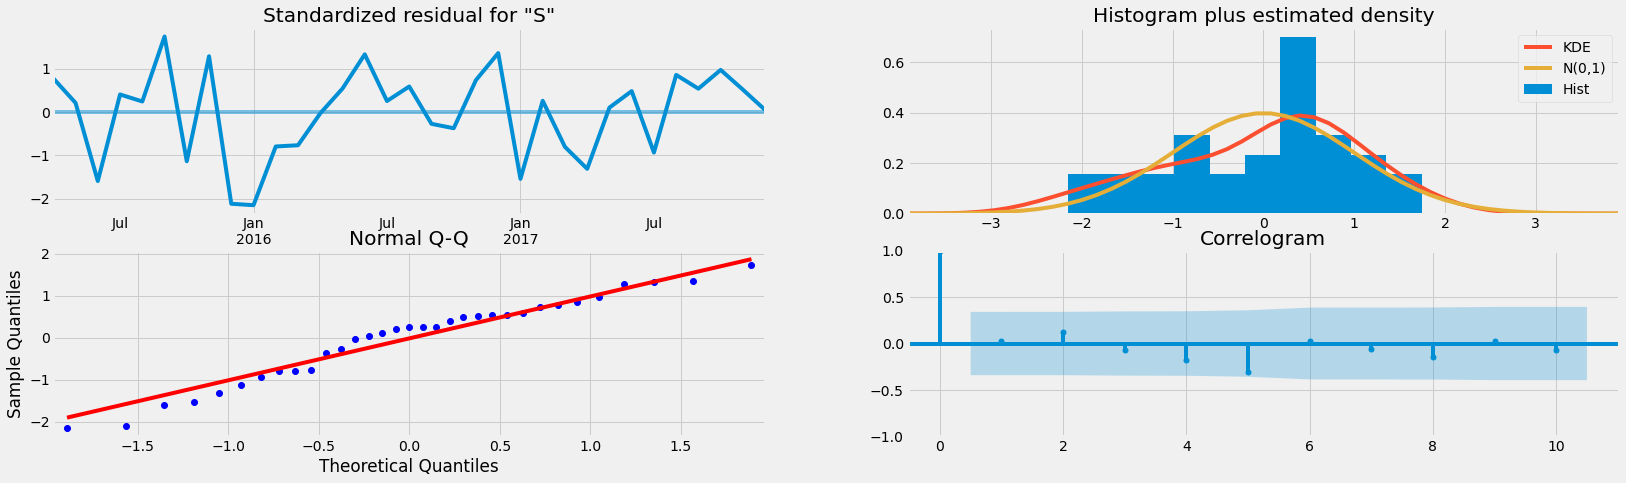

In [203]:
result.plot_diagnostics(figsize=(25,7))
plt.show()

In [204]:
# Validating forecast
# set forecast to start at 2017-01-01 to the end of the data 

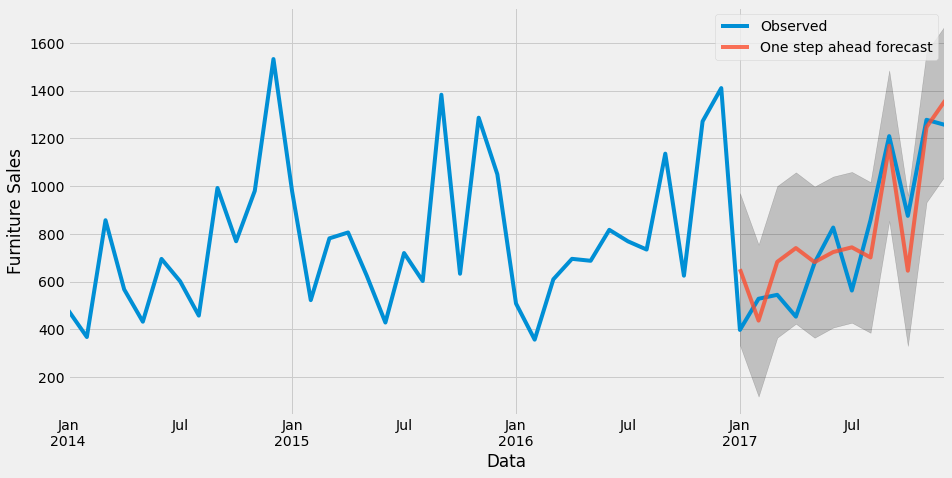

In [209]:
pred = results.get_prediction(start = pd.to_datetime("2017-01-01"), dynamic = False)
pred_ci = pred.conf_int()
ax = y["2014":].plot(label = "Observed")
pred.predicted_mean.plot(ax = ax, label = "One step ahead forecast", alpha = 0.8, figsize = (14,7),
                         xlabel = "Data", ylabel = "Furniture Sales")
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color = "k", alpha = 0.2)
plt.legend();

In [234]:
pred.predicted_mean

Order Date
2017-01-01     652.075452
2017-02-01     436.628660
2017-03-01     682.694063
2017-04-01     740.642063
2017-05-01     681.546561
2017-06-01     723.888115
2017-07-01     743.614187
2017-08-01     701.092801
2017-09-01    1169.154529
2017-10-01     645.678306
2017-11-01    1246.959621
2017-12-01    1358.788559
Freq: MS, Name: predicted_mean, dtype: float64

In [231]:
pred_ci.values

array([[ 333.86160137,  970.28930305],
       [ 118.54995141,  754.70736818],
       [ 365.17533692, 1000.21278849],
       [ 423.61947802, 1057.66464802],
       [ 364.96796775,  998.12515486],
       [ 407.7090952 , 1040.06713541],
       [ 427.79664209, 1059.43173141],
       [ 385.60380768, 1016.58179505],
       [ 853.96543907, 1484.34361886],
       [ 330.76403885,  960.59257337],
       [ 932.2981193 , 1561.62112341],
       [1044.35986658, 1673.21725057]])

In [214]:
y["2017":]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

In [236]:
# Calculate Root mean squared error(RMSE) - MAPE

In [237]:
prediction = pred.predicted_mean
Actuals = y["2017-01-01":]

In [246]:
mse = ((Actuals-prediction)**2).mean()
rmse = round(np.sqrt(mape),2)

In [247]:
rmse

160.34

In [248]:
# forecast for 2018

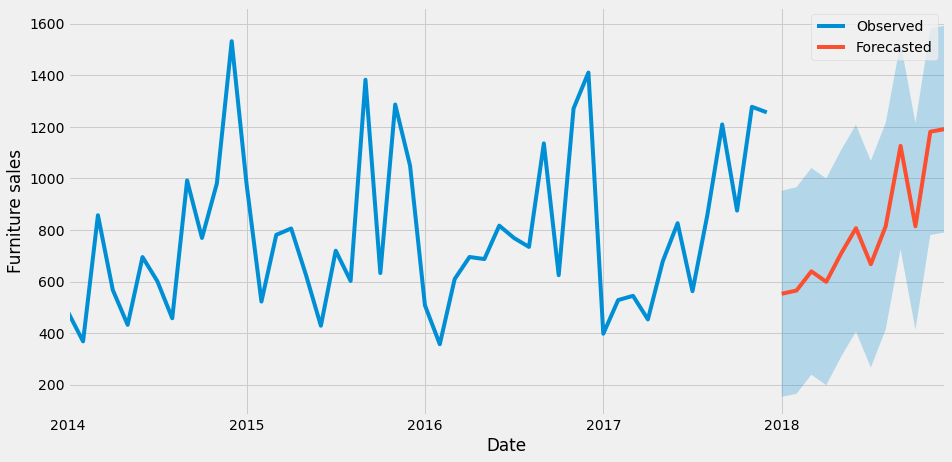

In [265]:
pred_uc = result.get_forecast(steps = 12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label = "Observed")
pred_uc.predicted_mean.plot(ax = ax, label = "Forecasted", xlabel="Date", ylabel="Furniture sales",figsize = (14,7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0],pred_ci.iloc[:,1], alpha = 0.25)
plt.legend()
plt.show()